# Flatten image from 2D to 1D

PCA requires a vectorized representation of images.

Flattening a 480x480 grayscale image results in a 230,400-dimensional vector (since 480 × 480 = 230,400 pixels).

In [1]:
import os
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Path to your dataset
data_dir = Path.cwd() / "dataset"  # Or specify a correct path to your dataset

# Lists to store flattened images and labels
images = []
labels = []

# Loop through each person's folder
for person_name in os.listdir(data_dir):
    person_path = os.path.join(data_dir, person_name)
    if os.path.isdir(person_path):  # Ensure it's a directory
        for img_name in os.listdir(person_path):
            img_path = os.path.join(person_path, img_name)
            try:
                # Open image and convert to NumPy array (grayscale image)
                img = Image.open(img_path)  # Assuming images are already grayscale
                img_array = np.array(img).flatten()  # Flatten to 1D
                images.append(img_array)  # Store flattened image
                labels.append(person_name)  # Store the corresponding label (person's name)
            except Exception as e:
                print(f"Error loading {img_path}: {e}")

# Convert lists to NumPy arrays
X = np.array(images)  # Feature matrix (each row is a flattened image)
y = np.array(labels)  # Labels (person's name corresponding to each image)


In [2]:
# CHECK

df = pd.DataFrame(X)
#df['y'] = y
#df.iloc[100]
df

,0,1,2,3,4,5,6,7,8,9,...,230390,230391,230392,230393,230394,230395,230396,230397,230398,230399
0,148,152,155,158,161,160,159,159,158,157,...,63,66,68,69,71,75,76,75,73,72
1,176,176,176,176,176,175,175,175,174,175,...,39,39,39,39,38,39,40,42,43,44
2,177,176,176,176,176,176,176,175,175,175,...,36,36,35,35,35,36,36,37,37,37
3,175,175,176,176,175,171,166,161,156,150,...,42,41,40,41,41,42,43,44,45,46
4,183,183,183,182,181,180,173,164,157,149,...,34,35,35,36,36,37,37,37,37,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,145,145,146,149,149,148,148,150,152,148,...,60,54,53,56,61,67,69,70,72,76
396,166,168,168,166,169,174,172,166,165,164,...,171,175,177,180,182,182,184,189,190,188
397,166,161,158,162,168,166,162,163,160,162,...,190,190,189,191,192,191,191,192,191,189
398,128,128,128,128,128,128,128,129,129,129,...,194,193,193,194,194,192,192,193,193,192


In [3]:
# CHECK 

unique_labels = np.unique(y)
unique_labels

array(['Ashley', 'Fenella', 'Kriti', 'Megan', 'Ranen', 'Shu Yeen',
       'Ting Yu', 'Wee Kian'], dtype='<U8')

Image matrix shape: (400, 230400)
Dataset loaded: 400 images, each of size 230400 pixels


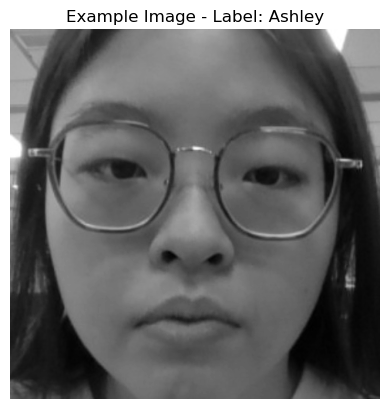

In [4]:
# Normalize the image data (optional, but recommended for PCA)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Standardize features (mean = 0, std = 1)

# Encode labels into numbers
#label_encoder = LabelEncoder()
#y_encoded = label_encoder.fit_transform(y)

print("Image matrix shape:", X.shape)
#print("Encoded labels shape:", y_encoded.shape)

print(f"Dataset loaded: {X.shape[0]} images, each of size {X.shape[1]} pixels")
#print(f"Unique labels: {label_encoder.classes_}")

# Show a sample image
sample_img = X[0].reshape(480, 480)  # Reshape to original size (adjust if needed)
plt.imshow(sample_img, cmap="gray")
plt.title(f"Example Image - Label: {([y[0]])[0]}")
plt.axis('off')  # Hide axes
plt.show()

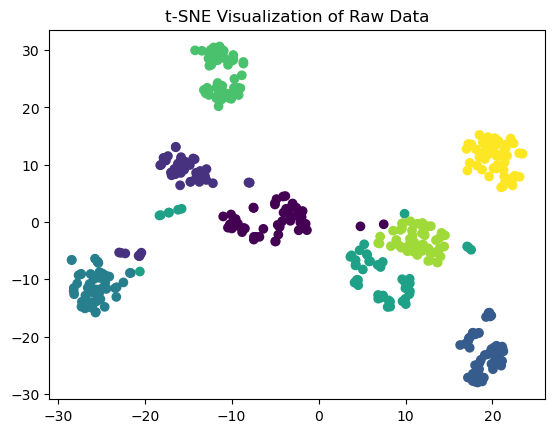

In [5]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=42)
X_embedded = tsne.fit_transform(X_scaled)

plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=LabelEncoder().fit_transform(y), cmap='viridis')
plt.title("t-SNE Visualization of Raw Data")
plt.show()


# Import PCA to find N compoments

Number of components selected: 110
Explained variance ratio: [0.2240802  0.12650754 0.09807419 0.07635535 0.04707726 0.03574785
 0.02903089 0.02484325 0.021687   0.01778206 0.015697   0.01320819
 0.01151163 0.0109836  0.00948616 0.00849344 0.00795717 0.00687934
 0.00683476 0.00660271 0.00595645 0.00578184 0.005381   0.00505412
 0.00477299 0.00418169 0.00405578 0.0039612  0.00364751 0.00355774
 0.0033566  0.00314384 0.00303333 0.00290817 0.00287635 0.00271905
 0.00255078 0.00247862 0.00232622 0.00228115 0.00224305 0.00216238
 0.00203815 0.00198028 0.0019593  0.00187208 0.00185331 0.00177712
 0.0017696  0.00170936 0.00169171 0.00163178 0.00157453 0.00154645
 0.00151628 0.00144448 0.00143103 0.00141928 0.00138668 0.00136005
 0.00132016 0.0013011  0.00126485 0.00122292 0.00121322 0.0011625
 0.0011393  0.00112064 0.0011016  0.00108573 0.00106188 0.00104069
 0.00102767 0.00101129 0.00099807 0.0009815  0.00096671 0.00094592
 0.00092918 0.00091124 0.00088785 0.00086617 0.00085988 0.00084717
 0

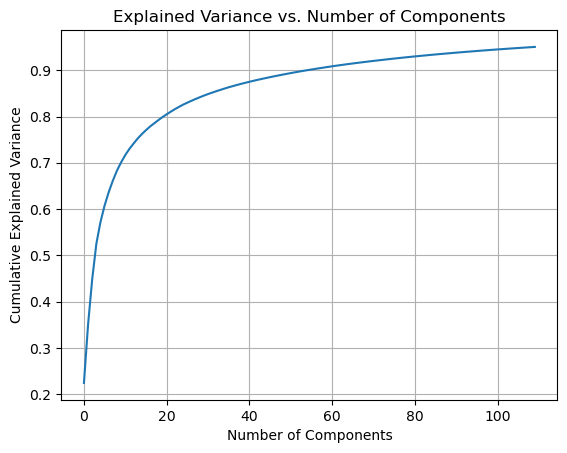

In [6]:
from sklearn.decomposition import PCA
# Apply PCA to capture at least 95% of the variance
pca = PCA(n_components=0.95)  
X_pca = pca.fit_transform(X_scaled)

# Get the explained variance ratio for each component
explained_variance_ratio = pca.explained_variance_ratio_

# Get the total number of components selected
num_components = pca.n_components_

# Print the results
print(f"Number of components selected: {num_components}")
print(f"Explained variance ratio: {explained_variance_ratio}")
print(f"Cumulative explained variance: {np.cumsum(explained_variance_ratio)}")

# Optional: Plot the explained variance
plt.plot(np.cumsum(explained_variance_ratio))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.grid(True)
plt.show()


Diagonal values represent variance: How much information (or variability) each principal component captures. The higher the variance, the more important the component.

Off-diagonal values represent covariance between different principal components: In your case, these are very small (near zero), indicating that the components are uncorrelated (orthogonal to each other).

In [8]:
# CHECK
# Compute covariance of the PCA-transformed data
cov_matrix_pca = np.cov(X_pca, rowvar=False)

# Print the first few covariance values
print("First 5 Variance Values (Diagonal of Covariance Matrix):")
print(np.diag(cov_matrix_pca)[:5])

print("\nFirst Few Covariances (Off-Diagonal Values):")
print(cov_matrix_pca[:5, :5])  # Show a small portion



First 5 Variance Values (Diagonal of Covariance Matrix):
[51757.47227418 29220.3870712  22652.92553812 17636.36370673
 10873.78462253]

First Few Covariances (Off-Diagonal Values):
[[ 5.17574723e+04  1.75060634e-11 -5.83535448e-12 -8.16949627e-12
   7.00242537e-12]
 [ 1.75060634e-11  2.92203871e+04 -6.41888993e-12  1.45883862e-13
   7.29419310e-13]
 [-5.83535448e-12 -6.41888993e-12  2.26529255e+04 -7.00242537e-12
  -7.29419310e-13]
 [-8.16949627e-12  1.45883862e-13 -7.00242537e-12  1.76363637e+04
  -3.86592234e-12]
 [ 7.00242537e-12  7.29419310e-13 -7.29419310e-13 -3.86592234e-12
   1.08737846e+04]]


In [9]:
# CHECK
# Contains the weights (coefficients) for each face.
X_pca

array([[-220.38072125,   78.93067715,  -14.36955076, ...,    3.86778764,
          -0.70999288,    9.62728173],
       [ -36.92029776,  168.89084778,  -58.66025575, ...,   -7.29108387,
         -19.97152342,    2.74110671],
       [  36.1356332 ,  306.25134906,  -83.649626  , ...,    1.95971266,
          -1.09958039,   -3.08310921],
       ...,
       [ 103.10542063, -150.23101926,  235.86071434, ...,    8.88300401,
          -6.94409709,    9.41663205],
       [  82.72131092, -218.84034397,  254.77928073, ...,   11.6868628 ,
         -45.92775036,  -15.28127719],
       [  53.70074009, -135.28682191,  228.75611479, ...,    2.40010976,
          -0.44035685,  -16.30256127]])

## eigenfaces

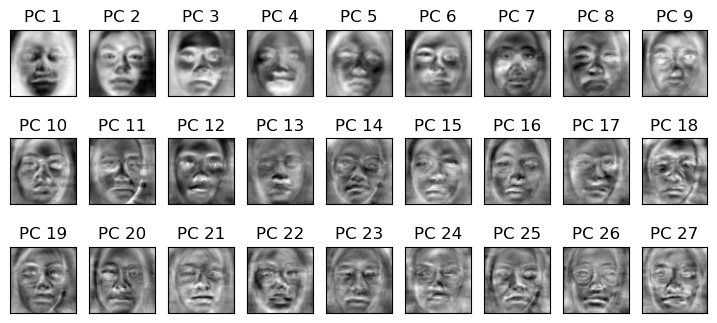

In [7]:
# Show eigenfaces
def show_eigenfaces(pca):
    fig, axes = plt.subplots(3, 9, figsize=(9, 4), subplot_kw={'xticks':[], 'yticks':[]})
    for i, ax in enumerate(axes.flat):
        ax.imshow(pca.components_[i].reshape(480, 480), cmap='gray')  # Adjust image size
        ax.set_title("PC " + str(i+1))
    plt.show()

show_eigenfaces(pca)

X_scaled

y

(400, 110)


<Axes: xlabel='0', ylabel='1'>

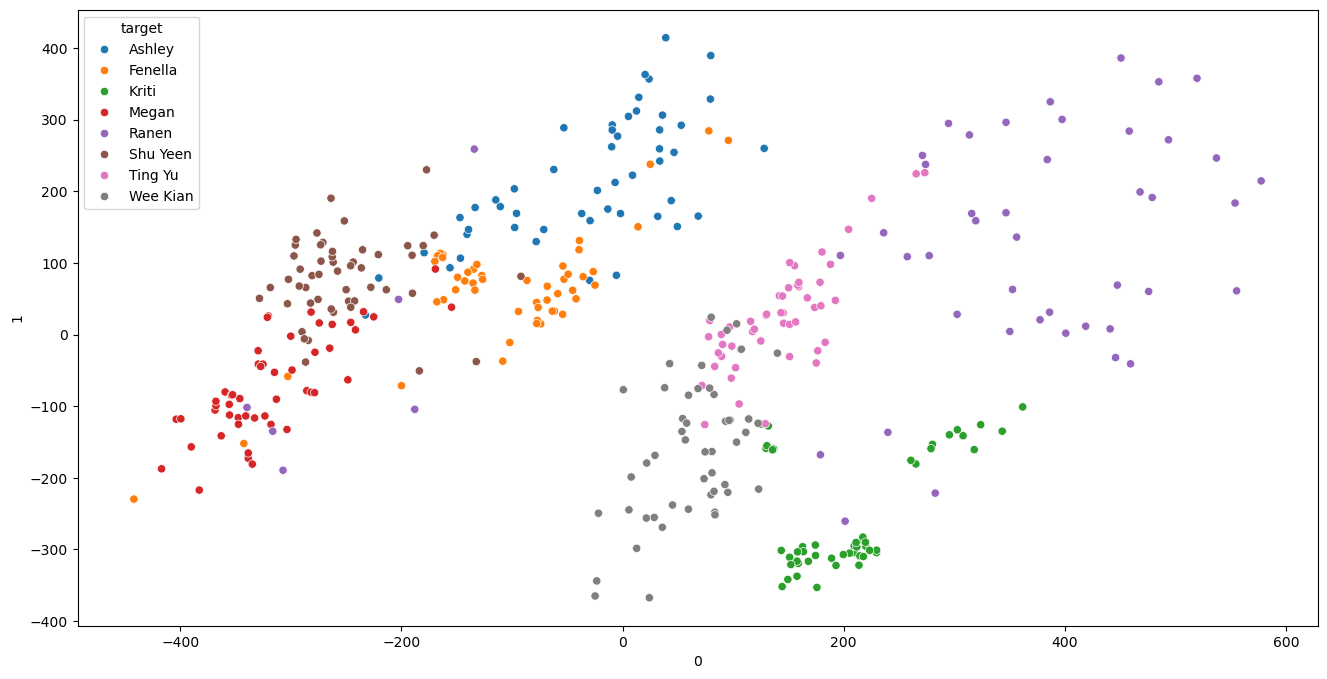

In [10]:
# Create a PCA instance:
pca = PCA(n_components=110)

# Fit pca to 'X'
pca_features = pca.fit_transform(X_scaled)
print (pca_features.shape)

df_plot = pd.DataFrame(pca_features)
df_plot["target"] = y

plt.figure(figsize=(16, 8))

import seaborn as sns
sns.scatterplot(x=df_plot[0] , y= df_plot[1], data = df_plot,  hue = "target" )

### Weights

In [12]:
# CHECK

import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Assume X_train contains flattened grayscale images (each row is a face)
pca = PCA(n_components=0.95)  # Keeping top 100 eigenfaces
X_pca = pca.fit_transform(X_scaled)  # Get PCA weights for all images

# Get the mean face (needed for reconstruction)
mean_face = np.mean(X_scaled, axis=0)

# Select a new face for testing
new_face = X_scaled[2].reshape(1, -1)  # Reshape into 2D array

# Get PCA weights for the new face
new_face_weights = pca.transform(new_face)  # This gives w1, w2, w3...

# Print the weights
print("PCA Weights for the new face:")
print(new_face_weights)

# total 110 components

PCA Weights for the new face:
[[ 3.61356332e+01  3.06251349e+02 -8.36496260e+01  1.67761030e+02
  -7.17858648e+01  1.52428361e+02 -1.31109861e+01 -8.04540323e+01
  -4.33176330e+01 -4.71345189e+01  1.84568389e+01 -1.27675356e+01
   9.43962539e+01  4.81864175e+01 -1.44355872e+01  1.10881109e+02
   2.26082265e+01  1.61290036e+01 -3.70772939e+01 -4.58833018e+01
  -1.56097983e+01 -7.65954152e+01  2.41735968e+01  6.46100773e+01
  -2.85021429e+01 -1.35003290e+01  1.21891585e+01  4.34069278e+01
  -1.29874774e+01 -1.15850481e+01 -2.13159117e+00 -1.04804118e+01
  -3.29646357e+00 -1.10013268e+01 -3.57856986e+01 -1.71481277e+01
   7.82903335e+00 -2.24473223e+01 -1.92048186e+01 -8.34595195e+00
   4.66031461e+01 -2.35291140e+01 -6.87564347e+01 -1.50012034e+00
   1.68454998e+00 -3.06197985e+01  2.33017211e+01 -1.22956662e-01
  -1.66530110e+01  1.47344126e+01  6.65080487e+00  1.38570841e+00
  -1.29776201e+01 -1.90667247e+01 -9.76854229e+00 -9.52897189e+00
   2.57449243e+01  1.88155785e+01  3.65187645e

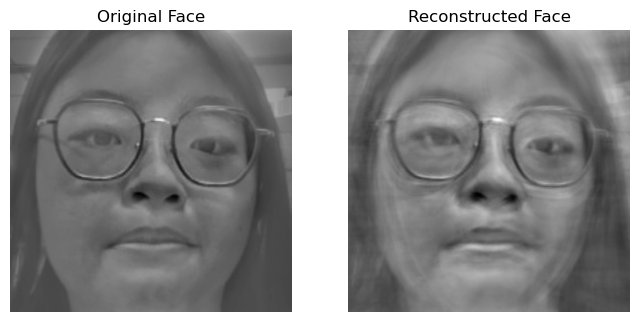

In [13]:
# CHECK

# Reconstruct the image from PCA weights
reconstructed_face = mean_face + np.dot(new_face_weights, pca.components_)

# Reshape back into 2D (assuming images are 64x64)
image_size = (480, 480)  # Change based on your dataset
reconstructed_face = reconstructed_face.reshape(image_size)

# Show the original and reconstructed image
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
ax[0].imshow(new_face.reshape(image_size), cmap='gray')
ax[0].set_title("Original Face")
ax[0].axis("off")

ax[1].imshow(reconstructed_face, cmap='gray')
ax[1].set_title("Reconstructed Face")
ax[1].axis("off")

plt.show()

### Encoder

In [14]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
y_enc = encoder.fit_transform(y)

In [15]:
y_enc

# 0- Ashley', 'Fenella', 'Kriti', 'Megan', 'Ranen', 'Shu Yeen', 'Ting Yu', 'Wee Kian' - 7

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6,

In [16]:
# Train the model
model = SVC(kernel='linear', probability=True)
model.fit(pca_features, y_enc)

SVC(kernel='linear', probability=True)

# Download model

In [15]:
import joblib

# SVC, PCA, LabelEncoder
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(pca, 'PCA model.pkl')

# Save the normalizer
joblib.dump(encoder, 'LabelEncoder.pkl')

joblib.dump(model, 'SVC model.pkl')

['SVC model.pkl']